In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import tempfile
import zipfile

In [3]:
temp_name = tempfile.TemporaryDirectory()
print(temp_name)

<TemporaryDirectory '/tmp/tmpu8j_w4r0'>


In [5]:
with zipfile.ZipFile('Classificador_Celulas_Infectadas.zip','r') as zip_ref:
    zip_ref.extractall(temp_name.name)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D,Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
classificador = Sequential()
classificador.add(InputLayer(shape = (64,64,3)))

classificador.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units=1, activation='sigmoid'))


In [8]:
classificador.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,985 (3.17 MB)

 Trainable params: 829,857 (3.17 MB)

 Non-trainable params: 128 (512.00 B)

In [9]:
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255 ,rotation_range=7,horizontal_flip=True,shear_range=0.2,height_shift_range=0.07,zoom_range=0.2)

In [11]:
gerador_teste = ImageDataGenerator(rescale = 1./255)

In [12]:
base_treinamento = gerador_treinamento.flow_from_directory(f'{temp_name.name}/Classificador_Celulas_Infectadas/dados_treino',target_size = (64,64),batch_size = 32,class_mode = 'binary')

Found 6000 images belonging to 2 classes.


In [13]:
base_teste = gerador_teste.flow_from_directory(f'{temp_name.name}/Classificador_Celulas_Infectadas/dados_teste',target_size = (64,64),batch_size = 32,class_mode = 'binary')

Found 1560 images belonging to 2 classes.


In [14]:
classificador.fit(base_treinamento, epochs = 5, validation_data = base_teste)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 60s 299ms/step - accuracy: 0.6282 - loss: 0.8329 - val_accuracy: 0.5000 - val_loss: 1.6562
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 299ms/step - accuracy: 0.7565 - loss: 0.5317 - val_accuracy: 0.5000 - val_loss: 1.4033
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 299ms/step - accuracy: 0.8719 - loss: 0.3331 - val_accuracy: 0.5288 - val_loss: 0.9985
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 300ms/step - accuracy: 0.9190 - loss: 0.2229 - val_accuracy: 0.8551 - val_loss: 0.3040
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 297ms/step - accuracy: 0.9242 - loss: 0.2110 - val_accuracy: 0.7385 - val_loss: 0.5439


In [15]:
imagem_teste = image.load_img(f'{temp_name.name}/Classificador_Celulas_Infectadas/dados_teste/Parasitized/C66P27N_ThinF_IMG_20150818_163551_cell_182.png', target_size=(64,64))

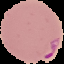

In [16]:
imagem_teste

In [17]:
imagem_teste = image.img_to_array(imagem_teste)

In [18]:
imagem_teste

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [19]:
imagem_teste /= 255

In [20]:
imagem_teste

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [21]:
imagem_teste.shape

(64, 64, 3)

In [22]:
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

In [23]:
imagem_teste.shape

(1, 64, 64, 3)

In [24]:
previsao = classificador.predict(imagem_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


In [25]:
previsao

array([[0.00156941]], dtype=float32)

In [26]:
previsao = previsao > 0.5

In [27]:
previsao

array([[False]])

In [28]:
base_treinamento.class_indices

{'Parasitized': 0, 'Uninfected': 1}